# MIA attacks on Length-of-Stay predictor, Gated Recurrent Unit with Decay (GRU-D)
## Installation of Packages in Conda

To install the required packages in your conda environment, you can use the following commands:

```bash
conda install h5py
conda install pytables

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys

from torch import zeros

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)

from utils.data_processing import get_mimic_dataloaders, get_mimic_dataset

In [3]:
# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), "data/")

train_frac = 0.4
valid_frac = 0.0
test_frac = 0.0
early_stop_frac = 0.4
batch_size = 59
flatten = False # If LR, flatten the data

dataset, train_indices, validation_indices, test_indices, early_stop_indices= get_mimic_dataset(path,
                                                                            train_frac ,
                                                                            valid_frac,
                                                                            test_frac,
                                                                            early_stop_frac,
                                                                            flatten)

In [4]:
train_loader, validation_loader, test_loader, early_stop_loader = get_mimic_dataloaders(dataset,
                                                            train_indices,
                                                            validation_indices,
                                                            test_indices,
                                                            early_stop_indices,
                                                            batch_size)

The best parameter is set based on 

In [5]:
best_hyperparams ={
    "cell_size": 58,
    "hidden_size": 50,
    "learning_rate": 0.0004738759319792616,
    "num_epochs":37,
    "patience_early_stopping": 20,
    "patience_lr_scheduler": 5,
    "batch_size": 59,
    "seed": 4410,
    "min_delta": 0.00001,
    }
n_features = int(dataset.x.shape[1]/3)
X_mean = zeros(1,dataset.x.shape[2],n_features)

model_params = {k: best_hyperparams[k] for k in ["cell_size", "hidden_size", "batch_size"]}

# Add other required parameters to model_params
model_params.update({
    "input_size": n_features,
    "X_mean": X_mean,
    "output_last": False
})

In [6]:
from utils.model_grud import *

# Initialize the model with filtered parameters
model = GRUD(**model_params)

# Train the model with Train_Model function
train_losses, test_losses , train_acc, test_acc = gru_trained_model_and_metadata(model,
                                                                                train_loader,
                                                                                early_stop_loader,
                                                                                epochs = best_hyperparams["num_epochs"],
                                                                                patience_early_stopping = best_hyperparams["patience_early_stopping"],
                                                                                patience_lr= best_hyperparams["patience_lr_scheduler"],
                                                                                min_delta = best_hyperparams["min_delta"],
                                                                                learning_rate = best_hyperparams["learning_rate"])

Model Structure:  GRUD(
  (zl): Linear(in_features=258, out_features=50, bias=True)
  (rl): Linear(in_features=258, out_features=50, bias=True)
  (hl): Linear(in_features=258, out_features=50, bias=True)
  (gamma_x_l): FilterLinear(in_features=104, out_features=104, bias=True)
  (gamma_h_l): Linear(in_features=104, out_features=50, bias=True)
  (fc): Linear(in_features=50, out_features=2, bias=True)
  (bn): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.7, inplace=False)
)
Start Training ... 
Output type dermined by the model


Training Progress:   3%|▎         | 1/37 [00:06<03:47,  6.33s/it]

Epoch 0: Validation loss improved to 0.5465
Learning Rate: 0.000474
Epoch: 0, train_loss: 0.91574515, valid_loss: 0.54652536, time: 6.33


Training Progress:   5%|▌         | 2/37 [00:12<03:31,  6.04s/it]

Epoch 1: No improvement. Patience counter: 1/20
Learning Rate: 0.000474
Epoch: 1, train_loss: 0.80619425, valid_loss: 0.55089885, time: 5.85


Training Progress:   8%|▊         | 3/37 [00:18<03:23,  5.98s/it]

Epoch 2: Validation loss improved to 0.5430
Learning Rate: 0.000474
Epoch: 2, train_loss: 0.77359988, valid_loss: 0.54295176, time: 5.89


Training Progress:  11%|█         | 4/37 [00:23<03:15,  5.94s/it]

Epoch 3: No improvement. Patience counter: 1/20
Learning Rate: 0.000474
Epoch: 3, train_loss: 0.75311428, valid_loss: 0.54693145, time: 5.88


Training Progress:  14%|█▎        | 5/37 [00:29<03:09,  5.91s/it]

Epoch 4: No improvement. Patience counter: 2/20
Learning Rate: 0.000474
Epoch: 4, train_loss: 0.72863275, valid_loss: 0.5505532, time: 5.88


Training Progress:  16%|█▌        | 6/37 [00:35<03:02,  5.89s/it]

Epoch 5: No improvement. Patience counter: 3/20
Learning Rate: 0.000474
Epoch: 5, train_loss: 0.70212508, valid_loss: 0.55445176, time: 5.85


Training Progress:  19%|█▉        | 7/37 [00:41<02:56,  5.89s/it]

Epoch 6: Validation loss improved to 0.5264
Learning Rate: 0.000474
Epoch: 6, train_loss: 0.69059086, valid_loss: 0.52636313, time: 5.87


Training Progress:  22%|██▏       | 8/37 [00:47<02:50,  5.88s/it]

Epoch 7: No improvement. Patience counter: 1/20
Learning Rate: 0.000474
Epoch: 7, train_loss: 0.67503941, valid_loss: 0.54865062, time: 5.87


Training Progress:  24%|██▍       | 9/37 [00:53<02:50,  6.09s/it]

Epoch 8: No improvement. Patience counter: 2/20
Learning Rate: 0.000474
Epoch: 8, train_loss: 0.66222243, valid_loss: 0.54420102, time: 6.54


Training Progress:  27%|██▋       | 10/37 [01:00<02:51,  6.34s/it]

Epoch 9: No improvement. Patience counter: 3/20
Learning Rate: 0.000474
Epoch: 9, train_loss: 0.65595967, valid_loss: 0.57257217, time: 6.93


Training Progress:  30%|██▉       | 11/37 [01:07<02:49,  6.52s/it]

Epoch 10: No improvement. Patience counter: 4/20
Learning Rate: 0.000474
Epoch: 10, train_loss: 0.63517105, valid_loss: 0.57987648, time: 6.91


Training Progress:  32%|███▏      | 12/37 [01:14<02:44,  6.59s/it]

Epoch 11: No improvement. Patience counter: 5/20
Learning Rate: 0.000474
Epoch: 11, train_loss: 0.62169916, valid_loss: 0.56918234, time: 6.75


Training Progress:  35%|███▌      | 13/37 [01:20<02:33,  6.38s/it]

Epoch 12: No improvement. Patience counter: 6/20
Epoch 00013: reducing learning rate of group 0 to 2.3694e-04.
Learning Rate: 0.000237
Epoch: 12, train_loss: 0.60484666, valid_loss: 0.58585578, time: 5.89


Training Progress:  38%|███▊      | 14/37 [01:26<02:23,  6.23s/it]

Epoch 13: No improvement. Patience counter: 7/20
Learning Rate: 0.000237
Epoch: 13, train_loss: 0.59263619, valid_loss: 0.578408, time: 5.9


Training Progress:  41%|████      | 15/37 [01:32<02:14,  6.12s/it]

Epoch 14: No improvement. Patience counter: 8/20
Learning Rate: 0.000237
Epoch: 14, train_loss: 0.58088603, valid_loss: 0.56650627, time: 5.87


Training Progress:  43%|████▎     | 16/37 [01:38<02:07,  6.05s/it]

Epoch 15: No improvement. Patience counter: 9/20
Learning Rate: 0.000237
Epoch: 15, train_loss: 0.57637249, valid_loss: 0.59794462, time: 5.88


Training Progress:  46%|████▌     | 17/37 [01:43<01:59,  5.99s/it]

Epoch 16: No improvement. Patience counter: 10/20
Learning Rate: 0.000237
Epoch: 16, train_loss: 0.56604034, valid_loss: 0.58306062, time: 5.86


Training Progress:  49%|████▊     | 18/37 [01:49<01:52,  5.95s/it]

Epoch 17: No improvement. Patience counter: 11/20
Learning Rate: 0.000237
Epoch: 17, train_loss: 0.56382535, valid_loss: 0.56528944, time: 5.84


Training Progress:  51%|█████▏    | 19/37 [01:55<01:46,  5.92s/it]

Epoch 18: No improvement. Patience counter: 12/20
Epoch 00019: reducing learning rate of group 0 to 1.1847e-04.
Learning Rate: 0.000118
Epoch: 18, train_loss: 0.55655927, valid_loss: 0.56542158, time: 5.86


Training Progress:  54%|█████▍    | 20/37 [02:01<01:40,  5.90s/it]

Epoch 19: No improvement. Patience counter: 13/20
Learning Rate: 0.000118
Epoch: 19, train_loss: 0.54329451, valid_loss: 0.56631804, time: 5.85


Training Progress:  57%|█████▋    | 21/37 [02:07<01:34,  5.88s/it]

Epoch 20: No improvement. Patience counter: 14/20
Learning Rate: 0.000118
Epoch: 20, train_loss: 0.5378569, valid_loss: 0.54777211, time: 5.85


Training Progress:  59%|█████▉    | 22/37 [02:13<01:28,  5.88s/it]

Epoch 21: No improvement. Patience counter: 15/20
Learning Rate: 0.000118
Epoch: 21, train_loss: 0.53511728, valid_loss: 0.56077629, time: 5.88


Training Progress:  62%|██████▏   | 23/37 [02:19<01:22,  5.87s/it]

Epoch 22: No improvement. Patience counter: 16/20
Learning Rate: 0.000118
Epoch: 22, train_loss: 0.52470232, valid_loss: 0.55289888, time: 5.85


Training Progress:  65%|██████▍   | 24/37 [02:24<01:16,  5.87s/it]

Epoch 23: No improvement. Patience counter: 17/20
Learning Rate: 0.000118
Epoch: 23, train_loss: 0.52599402, valid_loss: 0.53712106, time: 5.87


Training Progress:  68%|██████▊   | 25/37 [02:30<01:10,  5.88s/it]

Epoch 24: No improvement. Patience counter: 18/20
Epoch 00025: reducing learning rate of group 0 to 5.9234e-05.
Learning Rate: 0.000059
Epoch: 24, train_loss: 0.52590217, valid_loss: 0.54974645, time: 5.9


Training Progress:  70%|███████   | 26/37 [02:36<01:04,  5.89s/it]

Epoch 25: No improvement. Patience counter: 19/20
Learning Rate: 0.000059
Epoch: 25, train_loss: 0.51189875, valid_loss: 0.54926807, time: 5.9


Training Progress:  70%|███████   | 26/37 [02:42<01:08,  6.25s/it]

Epoch 26: No improvement. Patience counter: 20/20
Early stopping at epoch 26. Best validation loss: 0.5264


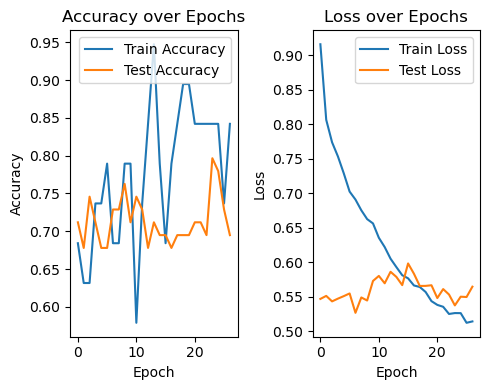

In [7]:
import matplotlib.pyplot as plt

# Convert losses to numpy-compatible lists directly
train_losses_cpu = [float(loss) for loss in train_losses]
test_losses_cpu = [float(loss) for loss in test_losses]

# Plot training and test accuracy
plt.figure(figsize=(5, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(test_acc, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

# Plot training and test loss
plt.subplot(1, 2, 2)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

##  Attacking the GRUD model
Modify ```audit.yaml ``` file to attack GRUD model: 
  
  ```
  module_path: "utils/model_grud.py" 
  model_class: "GRUD"
  target_folder: "./target_GRUD"
  data_path: "./data/unflattened/dataset.pkl"
  ```

In [8]:
from mimic_gru_handler import MimicInputHandlerGRU

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(MimicInputHandlerGRU, config_path)

# Run the audit
mia_results = leakpro.run_audit(return_results=True)

2024-12-18 13:36:42,583 INFO     Target model blueprint created from GRUD in utils/model_grud.py.
2024-12-18 13:36:42,592 INFO     Loaded target model metadata from ./target_GRUD/model_metadata.pkl
2024-12-18 13:36:42,595 INFO     Loaded target model from ./target_GRUD
2024-12-18 13:36:43,589 INFO     Loaded population dataset from ./data/unflattened/dataset.pkl
2024-12-18 13:36:43,590 INFO     Loaded population dataset from ./data/unflattened/dataset.pkl
2024-12-18 13:36:43,590 INFO     Creating shadow model handler singleton
2024-12-18 13:36:43,595 INFO     Creating distillation model handler singleton
2024-12-18 13:36:43,600 INFO     Configuring RMIA attack
2024-12-18 13:36:43,601 INFO     Added attack: rmia
2024-12-18 13:36:43,601 INFO     Added attack: lira
2024-12-18 13:36:43,601 INFO     Preparing attack: rmia
2024-12-18 13:36:43,602 INFO     Preparing shadow models for RMIA attack
2024-12-18 13:36:43,602 INFO     Preparing attack data for training the RMIA attack
2024-12-18 13:

RuntimeError: Error(s) in loading state_dict for GRUD:
	size mismatch for zl.weight: copying a param with shape torch.Size([40, 248]) from checkpoint, the shape in current model is torch.Size([50, 258]).
	size mismatch for zl.bias: copying a param with shape torch.Size([40]) from checkpoint, the shape in current model is torch.Size([50]).
	size mismatch for rl.weight: copying a param with shape torch.Size([40, 248]) from checkpoint, the shape in current model is torch.Size([50, 258]).
	size mismatch for rl.bias: copying a param with shape torch.Size([40]) from checkpoint, the shape in current model is torch.Size([50]).
	size mismatch for hl.weight: copying a param with shape torch.Size([40, 248]) from checkpoint, the shape in current model is torch.Size([50, 258]).
	size mismatch for hl.bias: copying a param with shape torch.Size([40]) from checkpoint, the shape in current model is torch.Size([50]).
	size mismatch for gamma_h_l.weight: copying a param with shape torch.Size([40, 104]) from checkpoint, the shape in current model is torch.Size([50, 104]).
	size mismatch for gamma_h_l.bias: copying a param with shape torch.Size([40]) from checkpoint, the shape in current model is torch.Size([50]).
	size mismatch for fc.weight: copying a param with shape torch.Size([2, 40]) from checkpoint, the shape in current model is torch.Size([2, 50]).

## Report Genrating

In [ ]:

# Import and initialize ReportHandler
from leakpro.reporting.report_handler import ReportHandler

# report_handler = ReportHandler()
report_handler = ReportHandler(report_dir="./leakpro_output/results")

# Save MIA resuls using report handler
for res in mia_results:
    report_handler.save_results(attack_name=res.attack_name, result_data=res, config=res.configs)

In [ ]:

# # Create the report by compiling the latex text
report_handler.create_report()